In [1]:
import os
import shutil
import random
import os
import numpy as np
from PIL import Image
import tensorflow as tf

2025-09-17 18:33:47.806828: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-17 18:33:47.967279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-17 18:33:47.967327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-17 18:33:47.986263: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-17 18:33:48.040017: I tensorflow/core/platform/cpu_feature_guar

In [2]:
pwd = os.getcwd()
f = os.path.join(pwd, "Images/mixed")
f2 = os.path.join(pwd, "Dataset")

In [3]:
f

'/home/saket-ubuntu/Cat_OR_Not/Images/mixed'

In [4]:
from PIL import Image, UnidentifiedImageError

def load_images_from_folder(folder, count, image_size=(128, 128)):
    images = []
    labels = []
    i=0
    for filename in os.listdir(folder):
        if i==count:
            break
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder, filename)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(image_size)
                images.append(np.array(img))

                label = 0 if 'cat' in filename.lower() else 1
                labels.append(label)

            except UnidentifiedImageError:
                print(f"Skipping corrupted image: {filename}")

        i+=1
    return np.array(images), np.array(labels)


In [5]:
base_folder = os.path.expanduser(f2)

X_train, y_train = load_images_from_folder(os.path.join(base_folder, 'train'), 9002)
X_val, y_val     = load_images_from_folder(os.path.join(base_folder, 'val'), 5000)
X_test, y_test   = load_images_from_folder(os.path.join(base_folder, 'test'), 5000)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Skipping corrupted image: cat_19743.jpg
Skipping corrupted image: cat_19743.jpg
Train shape: (9000, 128, 128, 3) (9000,)
Validation shape: (4998, 128, 128, 3) (4998,)
Test shape: (4999, 128, 128, 3) (4999,)


In [6]:
X_val.shape

(4998, 128, 128, 3)

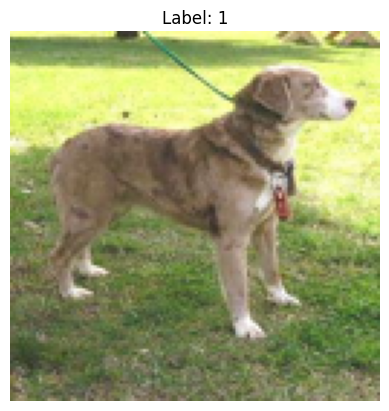

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])  
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()


In [8]:
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [9]:
np.save(os.path.join(pwd, "numpy_Datasets/X_train.npy"), X_train)
np.save(os.path.join(pwd, "numpy_Datasets/X_test.npy"), X_test)
np.save(os.path.join(pwd, "numpy_Datasets/X_val.npy"), X_val)
np.save(os.path.join(pwd, "numpy_Datasets/y_train.npy"), y_train)
np.save(os.path.join(pwd, "numpy_Datasets/y_test.npy"), y_test)
np.save(os.path.join(pwd, "numpy_Datasets/y_val.npy"), y_val)